###  Generate a 10*10 symmetric matrix with real-valued but random matrix elements between -1.0 and 1.0

In [1]:
using LinearAlgebra
using Colors,Plots
range=-0.9:0.1:0.9
A=Symmetric(rand(range,10,10))

10×10 Symmetric{Float64, Matrix{Float64}}:
  0.0   0.5   0.1  -0.9   0.9  -0.6  -0.2  -0.4   0.5   0.2
  0.5   0.8  -0.2   0.8   0.5   0.8  -0.6  -0.9  -0.6   0.3
  0.1  -0.2  -0.6  -0.3  -0.6   0.1   0.1   0.9  -0.1  -0.4
 -0.9   0.8  -0.3   0.9  -0.2  -0.1  -0.6   0.3  -0.1  -0.6
  0.9   0.5  -0.6  -0.2  -0.7  -0.4  -0.4   0.4  -0.2  -0.5
 -0.6   0.8   0.1  -0.1  -0.4  -0.8  -0.1   0.4   0.0   0.7
 -0.2  -0.6   0.1  -0.6  -0.4  -0.1   0.7  -0.8   0.3   0.6
 -0.4  -0.9   0.9   0.3   0.4   0.4  -0.8   0.2  -0.1  -0.4
  0.5  -0.6  -0.1  -0.1  -0.2   0.0   0.3  -0.1   0.2  -0.9
  0.2   0.3  -0.4  -0.6  -0.5   0.7   0.6  -0.4  -0.9  -0.5

### Make a graphic visualization of the matrix using a color scale.

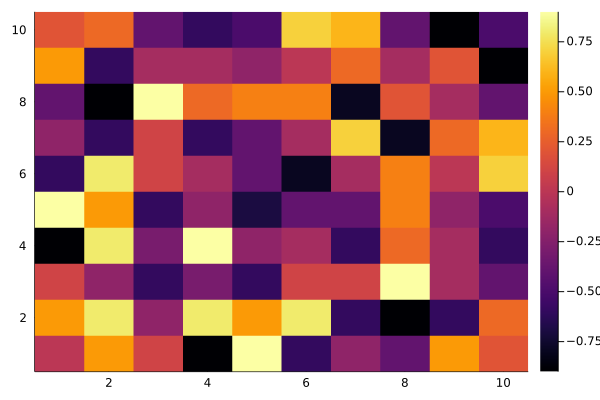

In [2]:
#inorder to visualize the matrix ,i have used image package in julia,the output depicts 
#between the various shades between white and black colour where white represents positive and black represents negative
using Images, ImageView
heatmap(A)

### Find the eigenvectors / values of the matrix.

In [3]:
#using in built julia command the eigenvalue and eigenvectors were calculated
eigvals(A)
B=(Diagonal(eigvals(A)))

10×10 Diagonal{Float64, Vector{Float64}}:
 -2.45402    ⋅         ⋅       …   ⋅         ⋅       ⋅        ⋅ 
   ⋅       -2.24947    ⋅           ⋅         ⋅       ⋅        ⋅ 
   ⋅         ⋅       -1.09106      ⋅         ⋅       ⋅        ⋅ 
   ⋅         ⋅         ⋅           ⋅         ⋅       ⋅        ⋅ 
   ⋅         ⋅         ⋅           ⋅         ⋅       ⋅        ⋅ 
   ⋅         ⋅         ⋅       …   ⋅         ⋅       ⋅        ⋅ 
   ⋅         ⋅         ⋅          0.947579   ⋅       ⋅        ⋅ 
   ⋅         ⋅         ⋅           ⋅        1.5426   ⋅        ⋅ 
   ⋅         ⋅         ⋅           ⋅         ⋅      2.16416   ⋅ 
   ⋅         ⋅         ⋅           ⋅         ⋅       ⋅       2.50719

In [4]:
eigv=eigvecs(A)

10×10 Matrix{Float64}:
  0.329789    0.26976      0.540814   …   0.596873    0.288782   -0.129141
  0.103736   -0.417079    -0.239219       0.0466453   0.539842    0.51765
 -0.455874    0.125517    -0.022583      -0.0255495  -0.241716   -0.0752513
 -0.0915546   0.203912     0.44175       -0.238207   -0.206011    0.587495
 -0.53081     0.193646    -0.260801       0.449058    0.0844464   0.115108
  0.0934788   0.629285    -0.0716179  …  -0.267387    0.0776469   0.121764
  0.155638   -0.00385465  -0.0745501     -0.376504    0.193119   -0.511599
  0.285271   -0.368675     0.159389       0.0695384  -0.557804    0.113883
 -0.258345   -0.239248     0.107039       0.268551   -0.183825   -0.225394
 -0.448812   -0.263183     0.582301      -0.30383     0.359051   -0.104718

### Create an approximation to the matrix by recreating it using only the two eigenvectors with the largest absolute eigenvalue.

In [5]:
# since only 2 vectors should be used the dimension of the the eigv matrix is being reduced
# The basic idea of recreation of the approximate matrix is 
# Approximate_matrix=(reduced_eigenvectors)*eigen_value*(reduced_eigenvectors)'
y=eigv[1:10,1:2]

10×2 Matrix{Float64}:
  0.329789    0.26976
  0.103736   -0.417079
 -0.455874    0.125517
 -0.0915546   0.203912
 -0.53081     0.193646
  0.0934788   0.629285
  0.155638   -0.00385465
  0.285271   -0.368675
 -0.258345   -0.239248
 -0.448812   -0.263183

In [6]:
# creating a transpose of the eigen vector
g=y'

2×10 adjoint(::Matrix{Float64}) with eltype Float64:
 0.329789   0.103736  -0.455874  …   0.285271  -0.258345  -0.448812
 0.26976   -0.417079   0.125517     -0.368675  -0.239248  -0.263183

In [7]:
# The approximate matrix is  app_A_1
app_A_1=g*B*y

2×2 Matrix{Float64}:
 0.146735   0.268613
 0.268613  -0.125365

### Make a graphic visualization of the approximate matrix, and compare it to the original matrix.

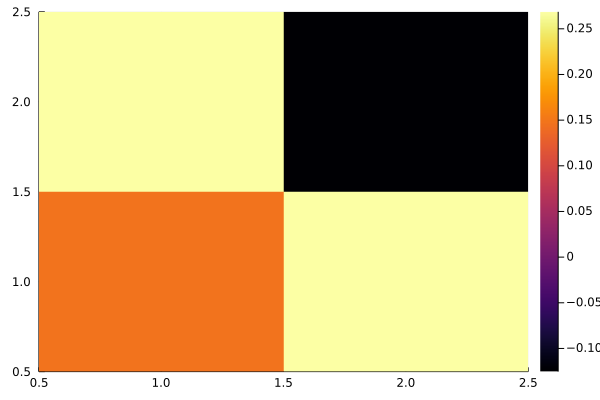

In [8]:
heatmap(app_A_1)

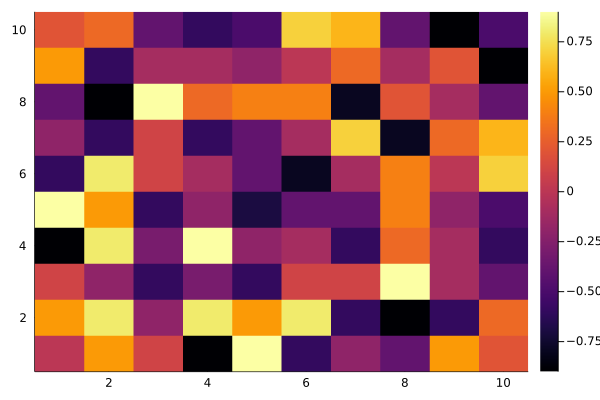

In [9]:
heatmap(A)

In [10]:
# we can conclude that the difference arises due to dimensionality and rank reduction of the approximate matrix

### Repeat steps 4 and 5 above, but now use the four eigenvectors with the largest absolute eigenvalue.

In [11]:
# since only 4 vectors should be used the dimension of the the eigv matrix is being reduced
# The basic idea of recreation of the approximate matrix is 
# Approximate_matrix=(reduced_eigenvectors)*eigen_value*(reduced_eigenvectors)'
P=eigv[1:10,1:4]

10×4 Matrix{Float64}:
  0.329789    0.26976      0.540814    0.0395775
  0.103736   -0.417079    -0.239219   -0.0397232
 -0.455874    0.125517    -0.022583    0.405017
 -0.0915546   0.203912     0.44175    -0.101371
 -0.53081     0.193646    -0.260801   -0.535991
  0.0934788   0.629285    -0.0716179  -0.320245
  0.155638   -0.00385465  -0.0745501  -0.418339
  0.285271   -0.368675     0.159389   -0.45568
 -0.258345   -0.239248     0.107039   -0.177544
 -0.448812   -0.263183     0.582301   -0.136105

In [12]:
# creating a transpose of the eigen vector
v=P'

4×10 adjoint(::Matrix{Float64}) with eltype Float64:
 0.329789    0.103736   -0.455874  …   0.285271  -0.258345  -0.448812
 0.26976    -0.417079    0.125517     -0.368675  -0.239248  -0.263183
 0.540814   -0.239219   -0.022583      0.159389   0.107039   0.582301
 0.0395775  -0.0397232   0.405017     -0.45568   -0.177544  -0.136105

In [13]:
# The approximate matrix is  app_A_2
app_A_2=v*B*P

4×4 Matrix{Float64}:
  0.146735    0.268613  -1.08259     0.0334969
  0.268613   -0.125365  -1.1514      0.384588
 -1.08259    -1.1514    -0.0985393  -0.417203
  0.0334969   0.384588  -0.417203    0.277518

### Make a graphic visualization of the approximate matrix, and compare it to the original matrix.

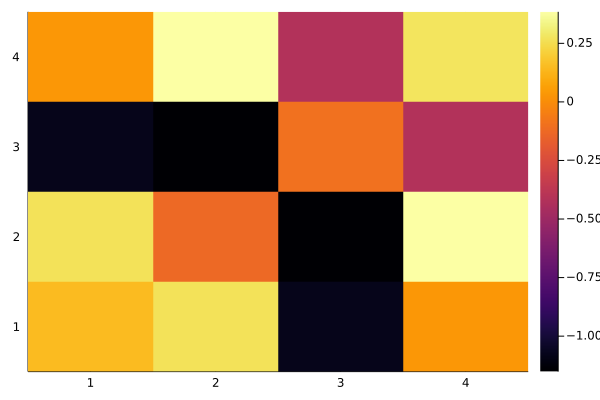

In [14]:
heatmap(app_A_2)

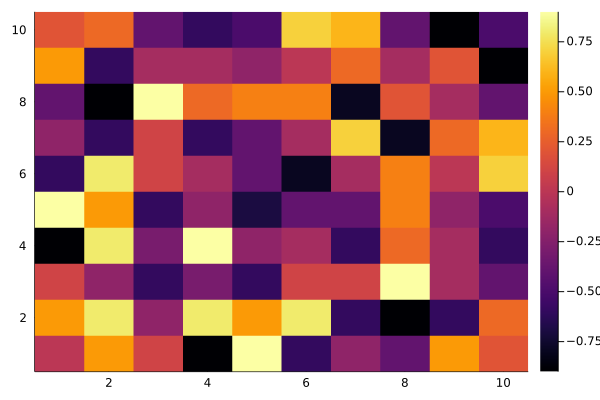

In [15]:
heatmap(A)

In [ ]:
# we can conclude that the difference arises due to dimensionality and rank reduction of the approximate matrix